# Unsupervised Planogram Compliance

http://openaccess.thecvf.com/content_ECCV_2018/html/Archan_Ray_U-PC_Unsupervised_Planogram_ECCV_2018_paper.html
http://openaccess.thecvf.com/content_ECCV_2018/papers/Archan_Ray_U-PC_Unsupervised_Planogram_ECCV_2018_paper.pdf

In [2]:
#IMPORTING LIBRARIES

import os
import io
import sys
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import cv2

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Hyperparameters 

In [4]:
#KERNEL SIZE
k = 20
k_des = 100

#STRIDE
s = 20
s_des = 100

#NUMBER OF CLUSTERS 
n_clusters = 3
n_clusters_des = 6

#NUMBER OF FEATURES
n_features=6

### 2. Input Rack Image

Shape of rack image: (1060, 3805, 3)


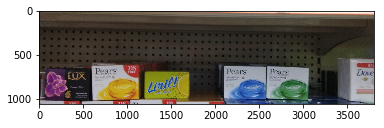

In [5]:
def read_rackImage(image_name):

    img=cv2.imread(image_name)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
    X=np.array(img)
    print('Shape of rack image: ' + str(X.shape))
    
    return X, img
    
X, img = read_rackImage('set3_rack.jpeg')

### 4. Retrive Padded Rack Image Details

In [6]:
def info_rackImage(X, img):
    
    h, w, channels = np.shape(X)
    info = (X, img, h, w, channels)
    
    return info

info = info_rackImage(X, img)

#### 5. Sliding Window

In [7]:
def sliding_window(info, k, s):

    X, h, w = info[0], info[2], info[3]
    X1np=[]
    
    for i in range(h//k):
        for j in range(w//k):
            
            window = X[i*k:i*k + k, j*k:j*k + k,:]
            X1np.append(np.array(window))
    
    #Flatten List of Sliding Windows
    X1np=np.asarray(X1np)
    X2np = X1np.reshape(X1np.shape[0], X1np.shape[1]*X1np.shape[2]*X1np.shape[3])
            
    return X1np , X2np

X1np ,X2np = sliding_window(info, k, s)
X1np_des, X2np_des = sliding_window(info, k_des, s_des)
print('Shape of list of sliding window instances: ' + str(X1np.shape) + ' '+str(X2np.shape))
print('Shape of list of sliding window instances: ' + str(X1np_des.shape) + ' '+str(X2np_des.shape))

Shape of list of sliding window instances: (10070, 20, 20, 3) (10070, 1200)
Shape of list of sliding window instances: (380, 100, 100, 3) (380, 30000)


# Extracting features of grid

In [8]:
X_des=[]

def surf_grid(X1np_des,n_features):
    for i in range(X1np_des.shape[0]):
        arr = np.zeros((5*32))
        surf = cv2.xfeatures2d.SURF_create()
        orb = cv2.ORB_create(nfeatures=n_features)
        keypoints, descriptors= orb.detectAndCompute(X1np_des[i], None)
        des = np.asarray(descriptors)
        des = des.flatten()

        for j in range(des.shape[0]):
            if des.shape[0] != 1:
                arr[j] = arr[j] + des[j]
        X_des.append(arr)
    return X_des
X_des=surf_grid(X1np_des,n_features)
X_des=np.asarray(X_des)
print(X_des.shape)

(380, 160)


## 6. Implement Kmeans_Cluster

In [9]:
def Kmeans_Cluster(X, n_clusters):

    kmeans = KMeans(n_clusters = n_clusters, random_state = 0,verbose = 0).fit_predict(X)
    print('Shape of Kmeans output: '+ str(kmeans.shape))
    
    return kmeans

kmeans = Kmeans_Cluster(X2np, n_clusters)
kmeans_des = Kmeans_Cluster(X_des, n_clusters_des)

#Instance of Kmeans output
instances = 1000
print('Cluster prediction for '+str(instances)+' windows: ' +str(kmeans[:instances]))

Shape of Kmeans output: (10070,)
Shape of Kmeans output: (380,)
Cluster prediction for 1000 windows: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

## 7. Image after Cluster Division

Shape of clustered rack image: (1060, 3805)


<function matplotlib.pyplot.show(*args, **kw)>

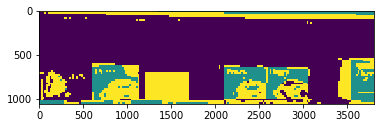

In [10]:
def cluster_rackImage(kmeans, info, n_clusters, k):

    X,img,h, w,c = info
    kmeans1 = kmeans.reshape(h//k, w//k)
    color_map = np.zeros((h, w))

    for i in range(kmeans1.shape[0]):
        for j in range(kmeans1.shape[1]):
            
            col=255/(n_clusters - 1)
            temp = col*kmeans1[i][j] 
            
            color_map[i*k : i*k + k, j*k : j*k + k] = np.full((k,k),temp)
    
    print('Shape of clustered rack image: ' + str(np.shape(color_map)))
        
    return color_map
    
color_map = cluster_rackImage(kmeans, info, n_clusters, k)
plt.imshow(color_map)
plt.show

Shape of clustered rack image: (1060, 3805)


<function matplotlib.pyplot.show(*args, **kw)>

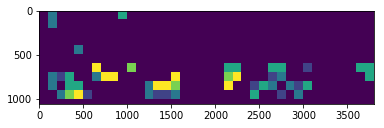

In [11]:
color_map_des = cluster_rackImage(kmeans_des, info, n_clusters_des, k_des)
plt.imshow(color_map_des)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

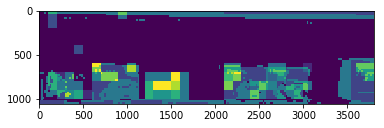

In [12]:
alpha = 0.6
color_map_sum = alpha*(color_map_des) + (1 - alpha)*color_map

kernel = np.ones((100,100), np.uint8) 
img_erosion = cv2.erode(color_map_sum, kernel, iterations=1) 
opening = cv2.morphologyEx(color_map_sum, cv2.MORPH_OPEN, kernel)

plt.imshow(color_map_sum)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

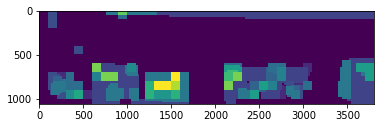

In [13]:
plt.imshow(opening)
plt.show

#### Notes
1) Changing the following things give different results:
<br/>a) col
<br/>b) n_clusters
<br/>c) kernel_size(k=20 is best till now)

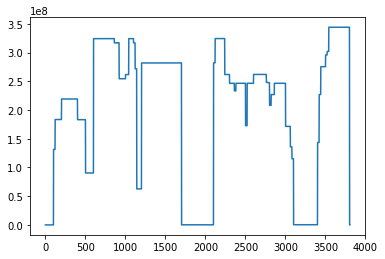

In [14]:
x_cluster = []
for i in range(img_erosion.shape[1]):
    x_cluster.append(i)    
y_cluster = []
for i in range(img_erosion.shape[1]):
    temp = 0
    for j in range(color_map_sum.shape[0]):
        if(opening[j,i]!=0):
            col=1
        else:
            col=0
        
        temp = temp + np.square(j)*col
        
    y_cluster.append(temp)
        
x_cluster = np.array(x_cluster)
y_cluster = np.array(y_cluster)
plt.plot(x_cluster, y_cluster)
plt.show()

# Moving Average

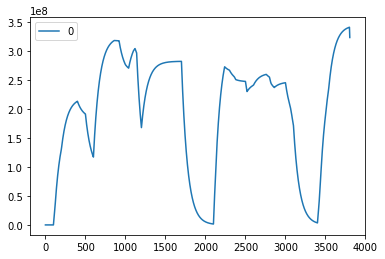

In [15]:
df=pd.DataFrame(data=y_cluster,index=range(y_cluster.shape[0]),columns=range(1))

window=150
df_rolling =df.rolling(window=window).mean()
df_short = df.ewm(span=window, adjust=False).mean()
df_short.tail()
df_short.plot()